<img src="https:////scontent.fhan9-1.fna.fbcdn.net/v/t39.30808-6/339122927_1347965006053141_1323654940389313527_n.jpg?_nc_cat=1&ccb=1-7&_nc_sid=5f2048&_nc_ohc=RxgK2wQBdfIAX9RQ12B&_nc_ht=scontent.fhan9-1.fna&oh=00_AfBOx5rlfgrGYgo-aGWT946hcP3U0n2WBaCcYTFM6OyZww&oe=65506ED3"
    style="width:500px; float: right; margin: 0 40px 40px 40px;"></img>

##  PHÂN TÍCH DỮ LIỆU PAGE [đài phát thanh](https://www.facebook.com/daiphatthanh.sound)
## Bài phân viết phân tích page được viết trong [NOTION](https://www.notion.so/Data-Analyze-Page-Facebook-6ba0209824a04832b291f084f583f6b9).

Phân tích dữ liệu: Một số câu hỏi tiềm năng để phân tích như: Đâu là bài viết
có lượt tương tác lớn nhất trong bộ dữ liệu?; Các mốc thời gian trong ngày mà
Fanpage thường xuyên đăng bài viết?; Số lượt tương tác trong các bài đăng thay
đổi như thế nào?; Đâu là các từ khóa xuất hiện nhiều nhất trong các bài đăng được
thu thập?; Sự tương quan giữa số lượng reactions với các trường khác như số lượng
bình luận, độ dài bài viết?; v.v. Ngoài ra, nếu có dữ liệu từ hai trang Fanpage mà
giả sử là hai trang tin tức, sự tương quan giữa nội dung của hai trang Fanpage như
thế nào?; v.v.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'Data\Data_cleared_28_11.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   post_id             204 non-null    int64  
 1   post_text           204 non-null    object 
 2   time                204 non-null    object 
 3   timestamp           204 non-null    float64
 4   images_description  204 non-null    object 
 5   comments            204 non-null    int64  
 6   shares              204 non-null    int64  
 7   comments_full       204 non-null    object 
 8   reactors            204 non-null    object 
 9   reactions           204 non-null    object 
 10  reaction_count      204 non-null    int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 17.7+ KB


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Phân tích lượt react theo post_id.

In [4]:
post_df_full1 = df
post_df_full1[['post_id','reactions']]

,post_id,reactions
0,914197540072635,"{'like': 88, 'love': 18, 'haha': 16, 'care': 1}"
1,914174400074949,"{'like': 2805, 'love': 1004, 'haha': 7, 'wow':..."
2,914151560077233,"{'like': 2877, 'love': 30, 'haha': 935, 'wow':..."
3,913951943430528,"{'like': 1394, 'love': 268, 'haha': 17, 'wow':..."
4,913920416767014,"{'like': 843, 'love': 191, 'haha': 4, 'wow': 1..."
...,...,...
199,906122894213433,"{'like': 6042, 'love': 2339, 'haha': 10, 'wow'..."
200,906132410879148,"{'like': 1722, 'love': 714, 'haha': 1, 'care':..."
201,906147284210994,"{'like': 1704, 'love': 322, 'haha': 4, 'care':..."
202,906040377555018,"{'like': 4299, 'love': 1770, 'haha': 14, 'wow'..."


In [5]:
post_df_full2=post_df_full1[['time','timestamp' ,'reaction_count']]
post_df_full2

,time,timestamp,reaction_count
0,2023-11-28 11:58:32,1.701148e+09,123
1,2023-11-28 10:53:40,1.701144e+09,3845
2,2023-11-28 09:48:24,1.701140e+09,3864
3,2023-11-27 23:59:52,1.701104e+09,1687
4,2023-11-27 22:46:26,1.701100e+09,1044
...,...,...,...
199,2023-11-12 20:00:49,1.699794e+09,8492
200,2023-11-12 19:30:33,1.699792e+09,2450
201,2023-11-12 19:02:54,1.699791e+09,2038
202,2023-11-12 13:43:43,1.699771e+09,6128


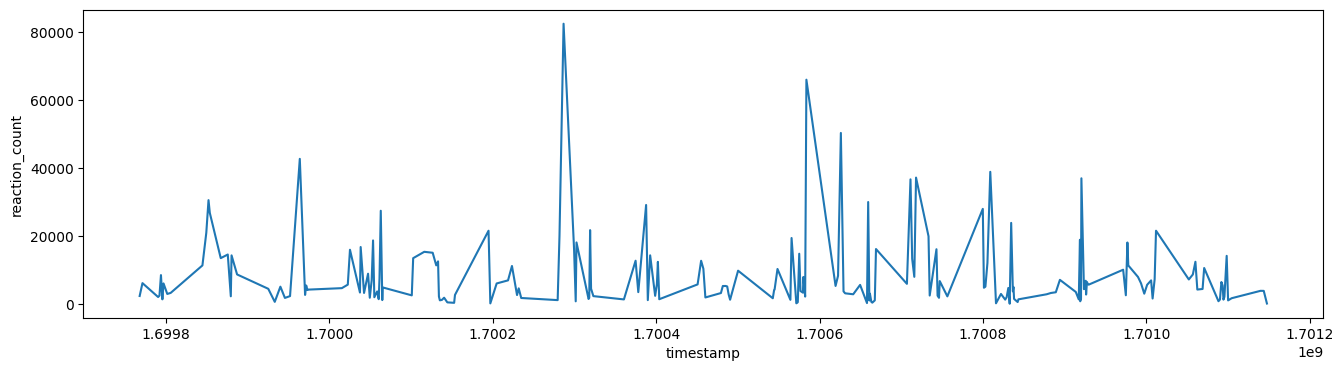

In [6]:
plt.figure(figsize=(16, 4))
dates=post_df_full2['timestamp'].to_list()
y=post_df_full2['reaction_count'].to_list()
plt.plot(dates,y)
plt.xlabel('timestamp')
plt.ylabel('reaction_count')
plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_25824\1698235717.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  post_df_full2['time'] = pd.to_datetime(post_df_full2['time'])


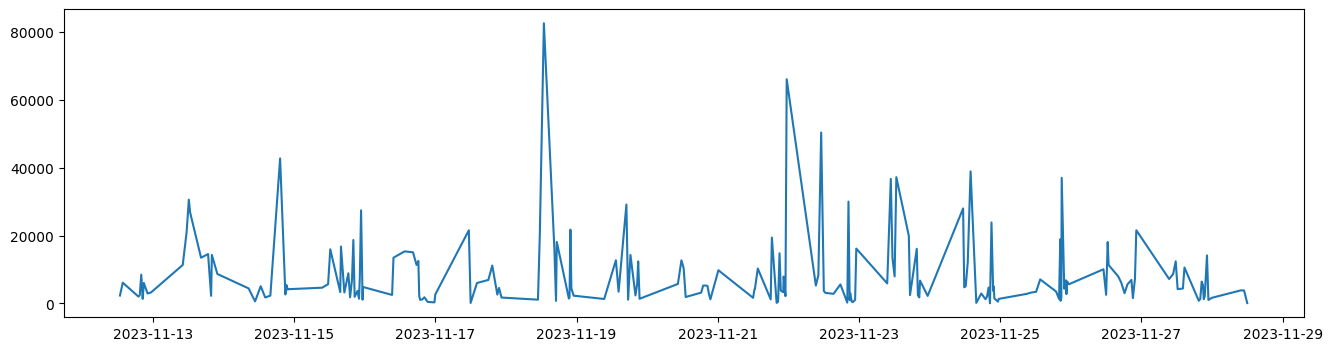

In [7]:
plt.figure(figsize=(16, 4))
post_df_full2['time'] = pd.to_datetime(post_df_full2['time'])
dates=post_df_full2['time'].to_list()
y=post_df_full2['reaction_count'].to_list()
plt.plot(dates,y)


In [8]:
df['reaction_count'].describe()

count      204.000000
mean      8372.901961
std      10997.212701
min         64.000000
25%       2091.250000
50%       4471.000000
75%      10734.000000
max      82515.000000
Name: reaction_count, dtype: float64

### Đâu là bài viết có lượt tương tác lớn nhất và nhỏ trong bộ dữ liệu ?

In [9]:
df.nlargest(1,'reaction_count')

,post_id,post_text,time,timestamp,images_description,comments,shares,comments_full,reactors,reactions,reaction_count
135,909089207250135,THẦY GIÁO NHẬT “NGẠI NGÙNG” KHI LẦN ĐẦU ĐƯỢC T...,2023-11-18 12:52:40,1.700287e+09,[],1400,1500,"[{'comment_id': '1460715988059959', 'comment_u...","[{'name': 'Minh Hằng', 'link': 'https://facebo...","{'like': 39963, 'love': 34694, 'haha': 2593, '...",82515


In [10]:
data = df[['post_text','time','timestamp','reaction_count']]
# thong tin bai post co reaction_count max
reaction_count_max = data['reaction_count'].max()
info_reaction_count_max = data[data['reaction_count']==reaction_count_max]
info_reaction_count_max.index = ['max']
# thong tin bai post co reaction_count min
reaction_count_min = data['reaction_count'].min()
info_reaction_count_min = data[data['reaction_count']==reaction_count_min]
info_reaction_count_min.index = ['min']
info_reaction_count_min_max = pd.concat([info_reaction_count_max,info_reaction_count_min],axis=0)
info_reaction_count_min_max

,post_text,time,timestamp,reaction_count
max,THẦY GIÁO NHẬT “NGẠI NGÙNG” KHI LẦN ĐẦU ĐƯỢC T...,2023-11-18 12:52:40,1.700287e+09,82515
min,Nhìn sâu vào chặng đường tìm kiếm bản thân mà ...,2023-11-24 20:31:58,1.700833e+09,64


In [11]:
post_df_full1['reactions'] = post_df_full1['reactions'].apply(lambda x : dict(eval(x)))
post_df_full_reactions = post_df_full1['reactions'].apply(pd.Series )

In [12]:

# gộp các cột lại vào dataframe
post_df_full_with_reactions = pd.concat([post_df_full1, post_df_full_reactions], axis=1).drop('reactions', axis=1)
post_df_full_with_reactions[['post_text','like','love','haha','wow','sad','angry','care',
                                 'shares','comments','reaction_count']]
#'like': 2853, 'love': 2725, 'haha': 8, 'wow': 1, 'care': 79, 'sad': 4

,post_text,like,love,haha,wow,sad,angry,care,shares,comments,reaction_count
0,Dù là một nữ idol thì Jiyeon (T-ara) vẫn sẽ là...,88.0,18.0,16.0,NaN,NaN,NaN,1.0,4,4,123
1,"ĐỘ TỘC XÂY TRƯỜNG ĐƯỢC RỒI!\r\n\r\nSáng 25/11,...",2805.0,1004.0,7.0,2.0,NaN,NaN,27.0,11,20,3845
2,Khi bạn là rapper mainstream nhưng vẫn muốn gi...,2877.0,30.0,935.0,3.0,14.0,NaN,5.0,44,54,3864
3,"Thái VG trở lại với Andy Vũ trong MV ""Điếc"", d...",1394.0,268.0,17.0,3.0,1.0,NaN,4.0,32,17,1687
4,Hoàng Thuỳ Linh và Đen cực tình tứ trong MV mớ...,843.0,191.0,4.0,1.0,1.0,NaN,4.0,32,20,1044
...,...,...,...,...,...,...,...,...,...,...,...
199,Mùa 1 The Masked Singer có ‘Anh Thương Em Đến ...,6042.0,2339.0,10.0,2.0,51.0,NaN,48.0,730,283,8492
200,"Có một Việt Nam cổ kính, hoài niệm cùng chuyện...",1722.0,714.0,1.0,NaN,3.0,NaN,10.0,90,33,2450
201,"Nguyên Hà trở lại với sản phẩm mới mang tên ""N...",1704.0,322.0,4.0,NaN,2.0,NaN,6.0,23,7,2038
202,"Chị đẹp HyunA “xả ảnh”, khoe những món quà đán...",4299.0,1770.0,14.0,3.0,1.0,NaN,41.0,11,14,6128


In [13]:
for i in range(0, len(post_df_full_with_reactions['like'].values), 1):
    if pd.isna(post_df_full_with_reactions['like'].values[i]):
        post_df_full_with_reactions['like'].values[i] = 0

    if pd.isna(post_df_full_with_reactions['love'].values[i]):
        post_df_full_with_reactions['love'].values[i] = 0

    if pd.isna(post_df_full_with_reactions['haha'].values[i]):
        post_df_full_with_reactions['haha'].values[i] = 0

    if pd.isna(post_df_full_with_reactions['wow'].values[i]):
        post_df_full_with_reactions['wow'].values[i] = 0

    if pd.isna(post_df_full_with_reactions['sad'].values[i]):
        post_df_full_with_reactions['sad'].values[i] = 0

    if pd.isna(post_df_full_with_reactions['angry'].values[i]):
        post_df_full_with_reactions['angry'].values[i] = 0

    if pd.isna(post_df_full_with_reactions['care'].values[i]):
        post_df_full_with_reactions['care'].values[i] = 0

    if pd.isna(post_df_full_with_reactions['shares'].values[i]):
        post_df_full_with_reactions['shares'].values[i] = 0
    
    if pd.isna(post_df_full_with_reactions['comments'].values[i]):
        post_df_full_with_reactions['comments'].values[i] = 0

post_df_full_with_reactions[['post_text','like','love','haha','wow','sad','angry','care',
                                 'shares','comments','reaction_count']]

,post_text,like,love,haha,wow,sad,angry,care,shares,comments,reaction_count
0,Dù là một nữ idol thì Jiyeon (T-ara) vẫn sẽ là...,88.0,18.0,16.0,0.0,0.0,0.0,1.0,4,4,123
1,"ĐỘ TỘC XÂY TRƯỜNG ĐƯỢC RỒI!\r\n\r\nSáng 25/11,...",2805.0,1004.0,7.0,2.0,0.0,0.0,27.0,11,20,3845
2,Khi bạn là rapper mainstream nhưng vẫn muốn gi...,2877.0,30.0,935.0,3.0,14.0,0.0,5.0,44,54,3864
3,"Thái VG trở lại với Andy Vũ trong MV ""Điếc"", d...",1394.0,268.0,17.0,3.0,1.0,0.0,4.0,32,17,1687
4,Hoàng Thuỳ Linh và Đen cực tình tứ trong MV mớ...,843.0,191.0,4.0,1.0,1.0,0.0,4.0,32,20,1044
...,...,...,...,...,...,...,...,...,...,...,...
199,Mùa 1 The Masked Singer có ‘Anh Thương Em Đến ...,6042.0,2339.0,10.0,2.0,51.0,0.0,48.0,730,283,8492
200,"Có một Việt Nam cổ kính, hoài niệm cùng chuyện...",1722.0,714.0,1.0,0.0,3.0,0.0,10.0,90,33,2450
201,"Nguyên Hà trở lại với sản phẩm mới mang tên ""N...",1704.0,322.0,4.0,0.0,2.0,0.0,6.0,23,7,2038
202,"Chị đẹp HyunA “xả ảnh”, khoe những món quà đán...",4299.0,1770.0,14.0,3.0,1.0,0.0,41.0,11,14,6128


In [14]:
post_df_full_with_reactions[['like','love','haha','wow','sad','angry','care',
                                 'shares','comments','reaction_count']].sum()

like              1039037.0
love               264056.0
haha               332023.0
wow                  5447.0
sad                 53632.0
angry                 111.0
care                13766.0
shares              27968.0
comments            53150.0
reaction_count    1708072.0
dtype: float64

<Axes: >

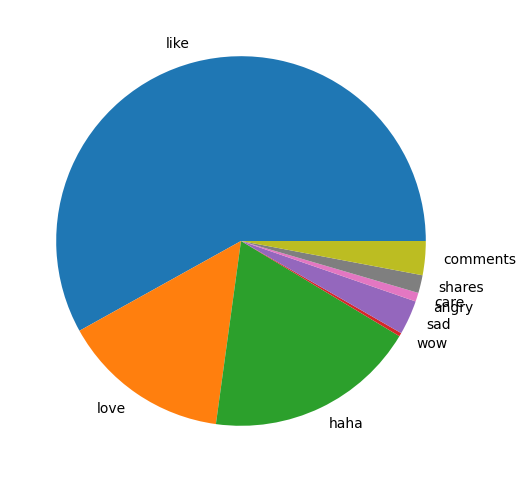

In [15]:
plt.figure(figsize=(8, 8))
df_pie_reactions = post_df_full_with_reactions[['like','love','haha','wow',
                                'sad','angry','care','shares','comments']]
df_pie_reactions.sum().plot(kind='pie', figsize=(14,6))


Text(0, 0.5, 'Số lượng')

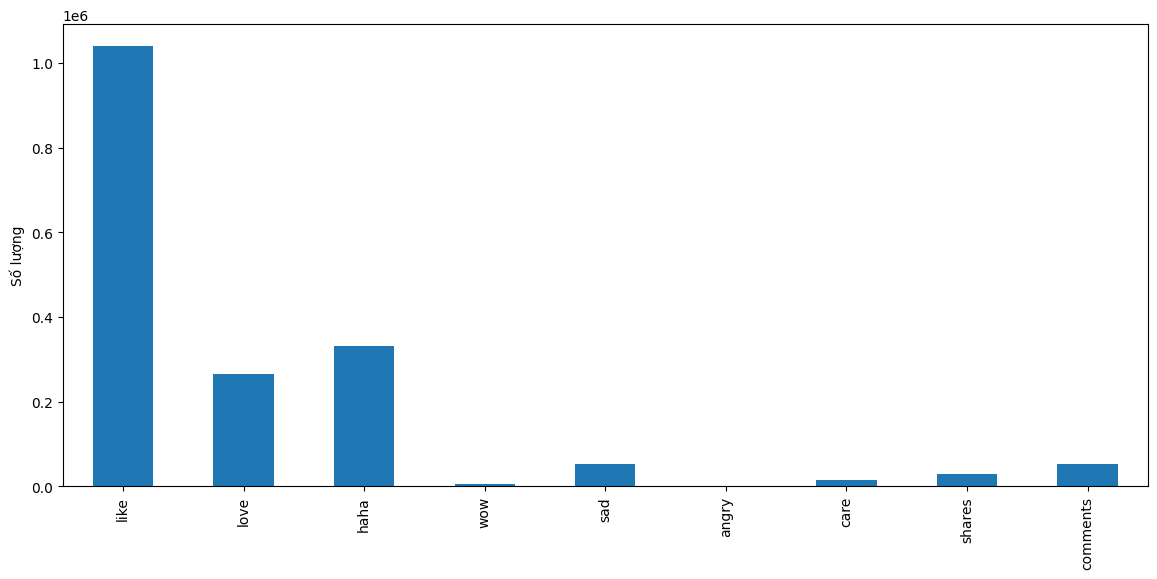

In [16]:
df_bar_reactions = post_df_full_with_reactions[['like','love','haha','wow','sad','angry','care',
                                 'shares','comments']]
ax = df_bar_reactions.sum().plot(kind='bar', figsize=(14,6))
ax.set_ylabel('Số lượng')

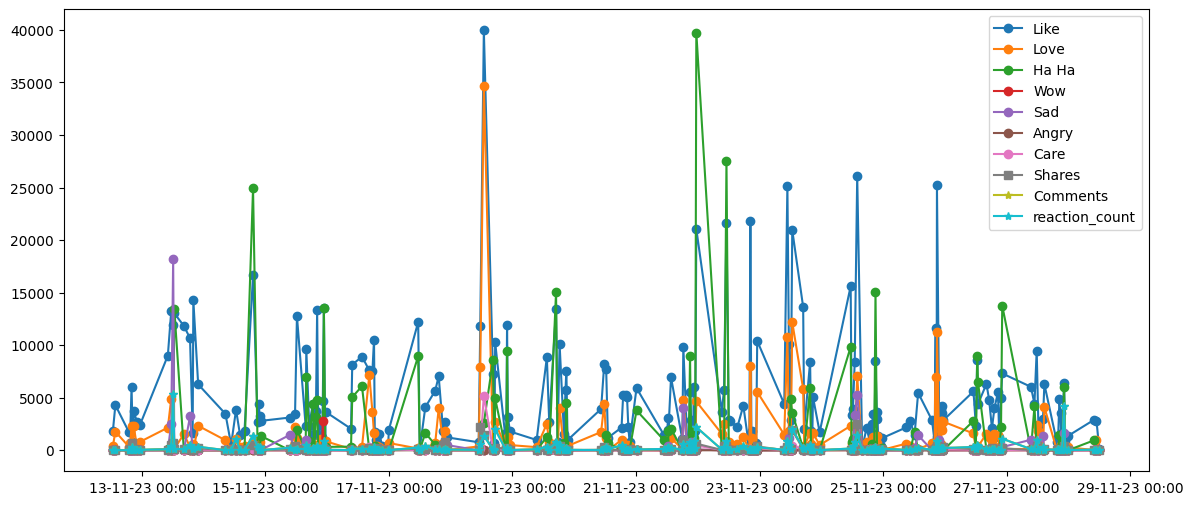

In [17]:
fig, ax = plt.subplots(figsize=(14, 6))
post_df_full_with_reactions['time'] = pd.to_datetime(post_df_full_with_reactions['time'])
ax.plot(post_df_full_with_reactions['time'], post_df_full_with_reactions['like'], label = "Like", marker="o")
ax.plot(post_df_full_with_reactions['time'], post_df_full_with_reactions['love'], label = "Love", marker="o")
ax.plot(post_df_full_with_reactions['time'], post_df_full_with_reactions['haha'], label = "Ha Ha", marker="o")
ax.plot(post_df_full_with_reactions['time'], post_df_full_with_reactions['wow'], label = "Wow", marker="o")
ax.plot(post_df_full_with_reactions['time'], post_df_full_with_reactions['sad'], label = "Sad", marker="o")
ax.plot(post_df_full_with_reactions['time'], post_df_full_with_reactions['angry'], label = "Angry", marker="o")
ax.plot(post_df_full_with_reactions['time'], post_df_full_with_reactions['care'], label = "Care", marker="o")
ax.plot(post_df_full_with_reactions['time'], post_df_full_with_reactions['shares'], label = "Shares", marker="s")
ax.plot(post_df_full_with_reactions['time'], post_df_full_with_reactions['comments'], label = "Comments", marker="*")
ax.plot(post_df_full_with_reactions['time'], post_df_full_with_reactions['comments'], label = "reaction_count", marker="*")

plt.legend()
from matplotlib.dates import DateFormatter
ax.xaxis.set_major_formatter(DateFormatter('%d-%m-%y %H:%M'))

In [18]:
# hiểm thị mối quan hệ Like, Love, Ha Ha, Wow, Sad, Angry, Care với cột Share
print(post_df_full_with_reactions[['like','love','haha','wow','sad','angry','care']].corrwith(post_df_full_with_reactions['shares']))
     

like     0.600260
love     0.613876
haha     0.143462
wow      0.047493
sad      0.300054
angry    0.106246
care     0.442154
dtype: float64


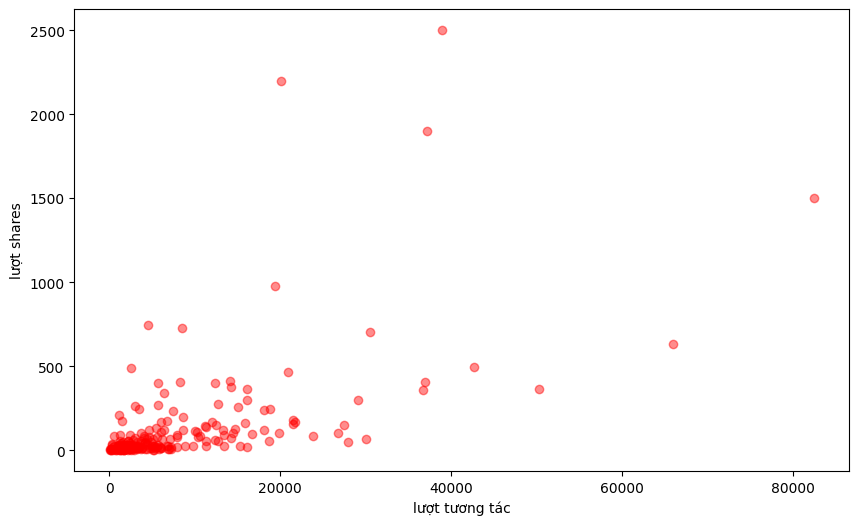

In [19]:
plt.figure(figsize = (10,6))
plt.scatter( df['reaction_count'], df['shares'],alpha = 0.45, color = 'red')
plt.xlabel('lượt tương tác')
plt.ylabel('lượt shares')
plt.show()

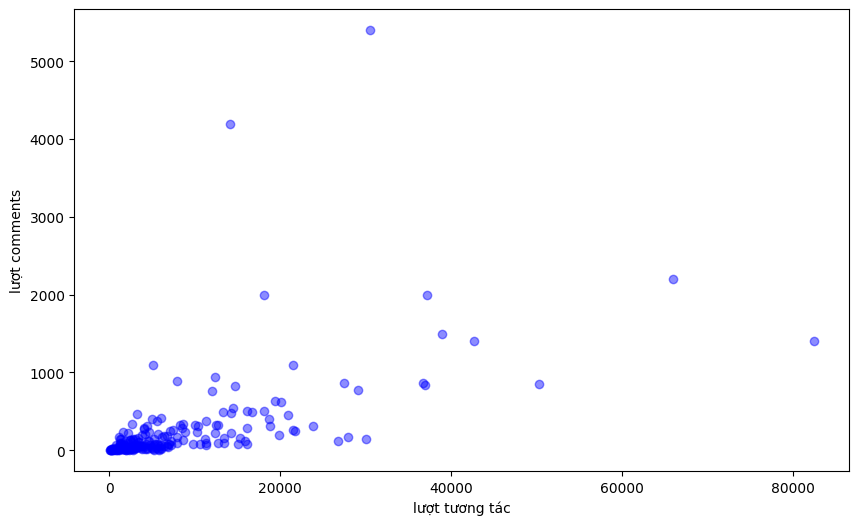

In [20]:
plt.figure(figsize = (10,6))
plt.scatter( df['reaction_count'], df['comments'],alpha = 0.45, color = 'blue')
plt.xlabel('lượt tương tác')
plt.ylabel('lượt comments')
plt.show()

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

 Đâu là bài viết
có lượt tương tác lớn nhất trong bộ dữ liệu?

In [21]:
df.nlargest(1,'reaction_count')

,post_id,post_text,time,timestamp,images_description,comments,shares,comments_full,reactors,reactions,reaction_count
135,909089207250135,THẦY GIÁO NHẬT “NGẠI NGÙNG” KHI LẦN ĐẦU ĐƯỢC T...,2023-11-18 12:52:40,1.700287e+09,[],1400,1500,"[{'comment_id': '1460715988059959', 'comment_u...","[{'name': 'Minh Hằng', 'link': 'https://facebo...","{'like': 39963, 'love': 34694, 'haha': 2593, '...",82515


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
Các mốc thời gian trong ngày mà Fanpage thường xuyên đăng bài viết?

Text(0.5, 1.0, 'Posting frequency by hour')

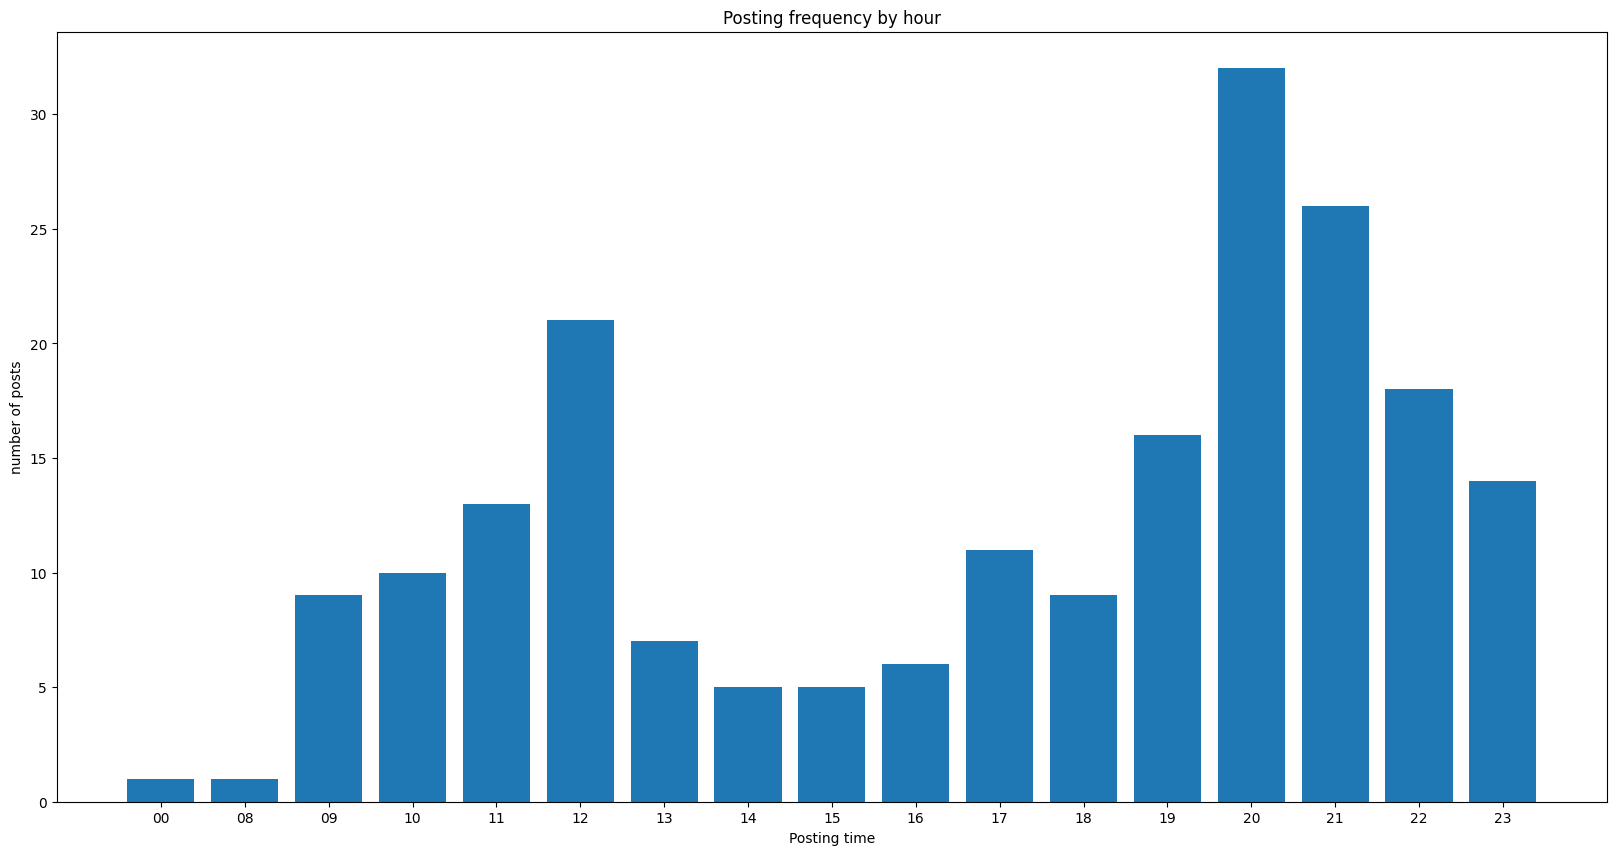

In [22]:
plt.figure(figsize=(20, 10)) 
day_posts = np.sort(post_df_full1['time'].str[11:13].unique())
number_posts = post_df_full1['time'].str[11:13].value_counts().sort_index()
plt.bar(x=day_posts,height=number_posts)
plt.xlabel('Posting time')
plt.ylabel('number of posts')
plt.title('Posting frequency by hour')

In [23]:
display(
    type(day_posts),
    type(number_posts)
)

numpy.ndarray

pandas.core.series.Series

### Lượng bài đăng thay đổi trong các ngày.

Text(0.5, 1.0, 'Posting frequency by hour')

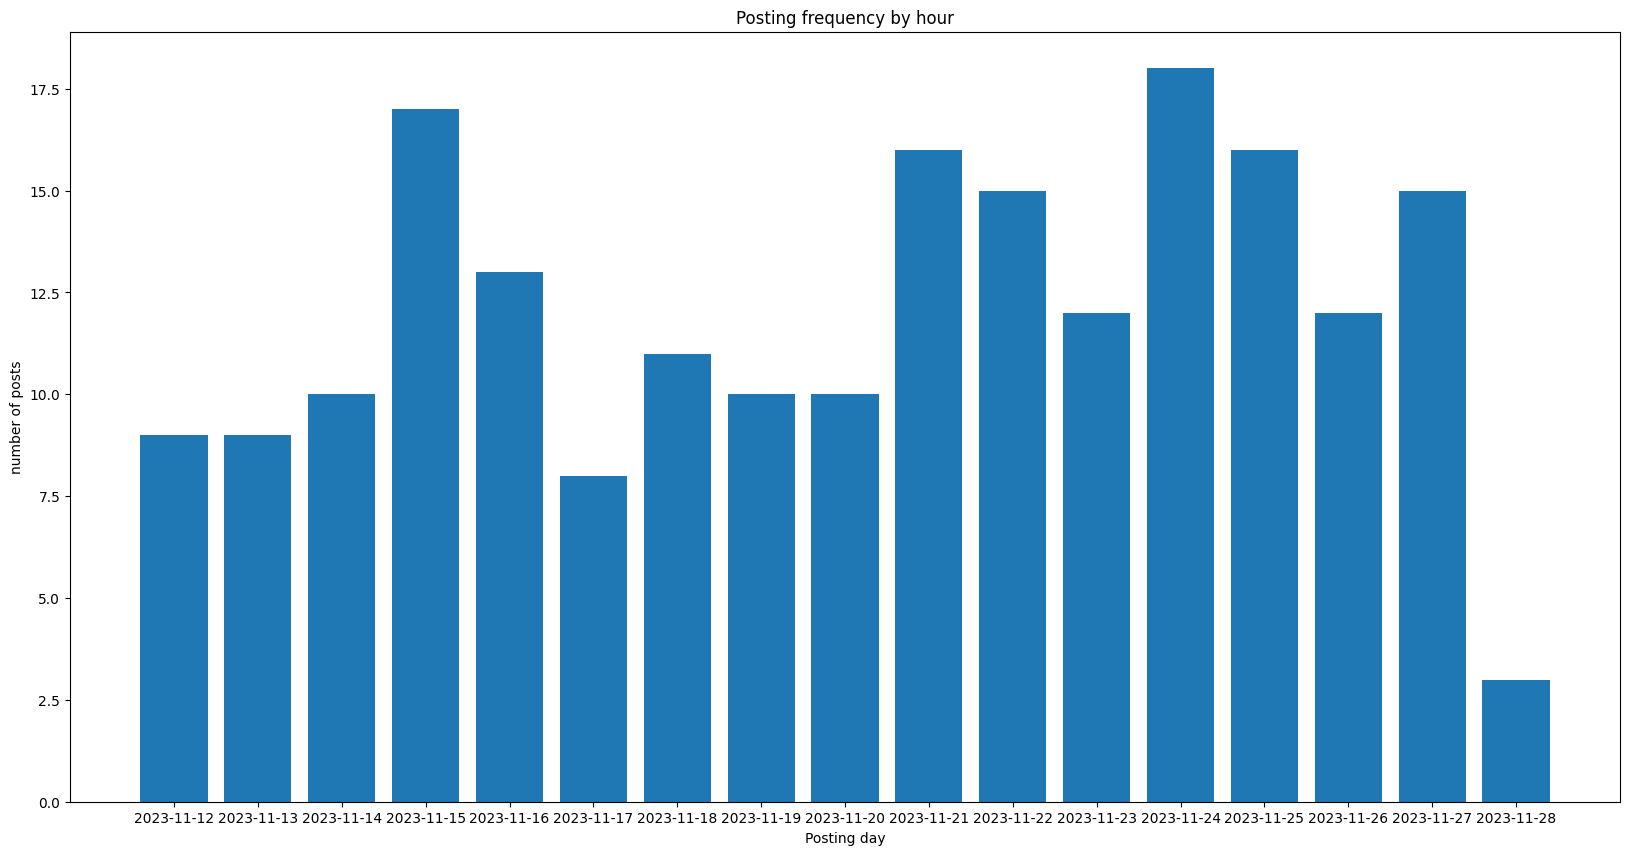

In [24]:
plt.figure(figsize=(20, 10)) 
day_posts = np.sort(post_df_full1['time'].str[0:10].unique())
number_posts = post_df_full1['time'].str[0:10].value_counts().sort_index()
plt.bar(x=day_posts,height=number_posts)
plt.xlabel('Posting day')
plt.ylabel('number of posts')
plt.title('Posting frequency by hour')

In [25]:
display(
    type(day_posts),
    type(number_posts)
)

numpy.ndarray

pandas.core.series.Series

 Số lượt tương tác trong các bài đăng thay
đổi như thế nào?

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
 Đâu là các từ khóa xuất hiện nhiều nhất trong các bài đăng được
thu thập?;

In [26]:
# sao chep post_text vao mang string.
text = ""
for i in post_df_full1["post_text"]:
    text = text + i + "\n"

In [27]:
# Import thư viện WordCloud 
from wordcloud import WordCloud
from pathlib import Path
import os
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

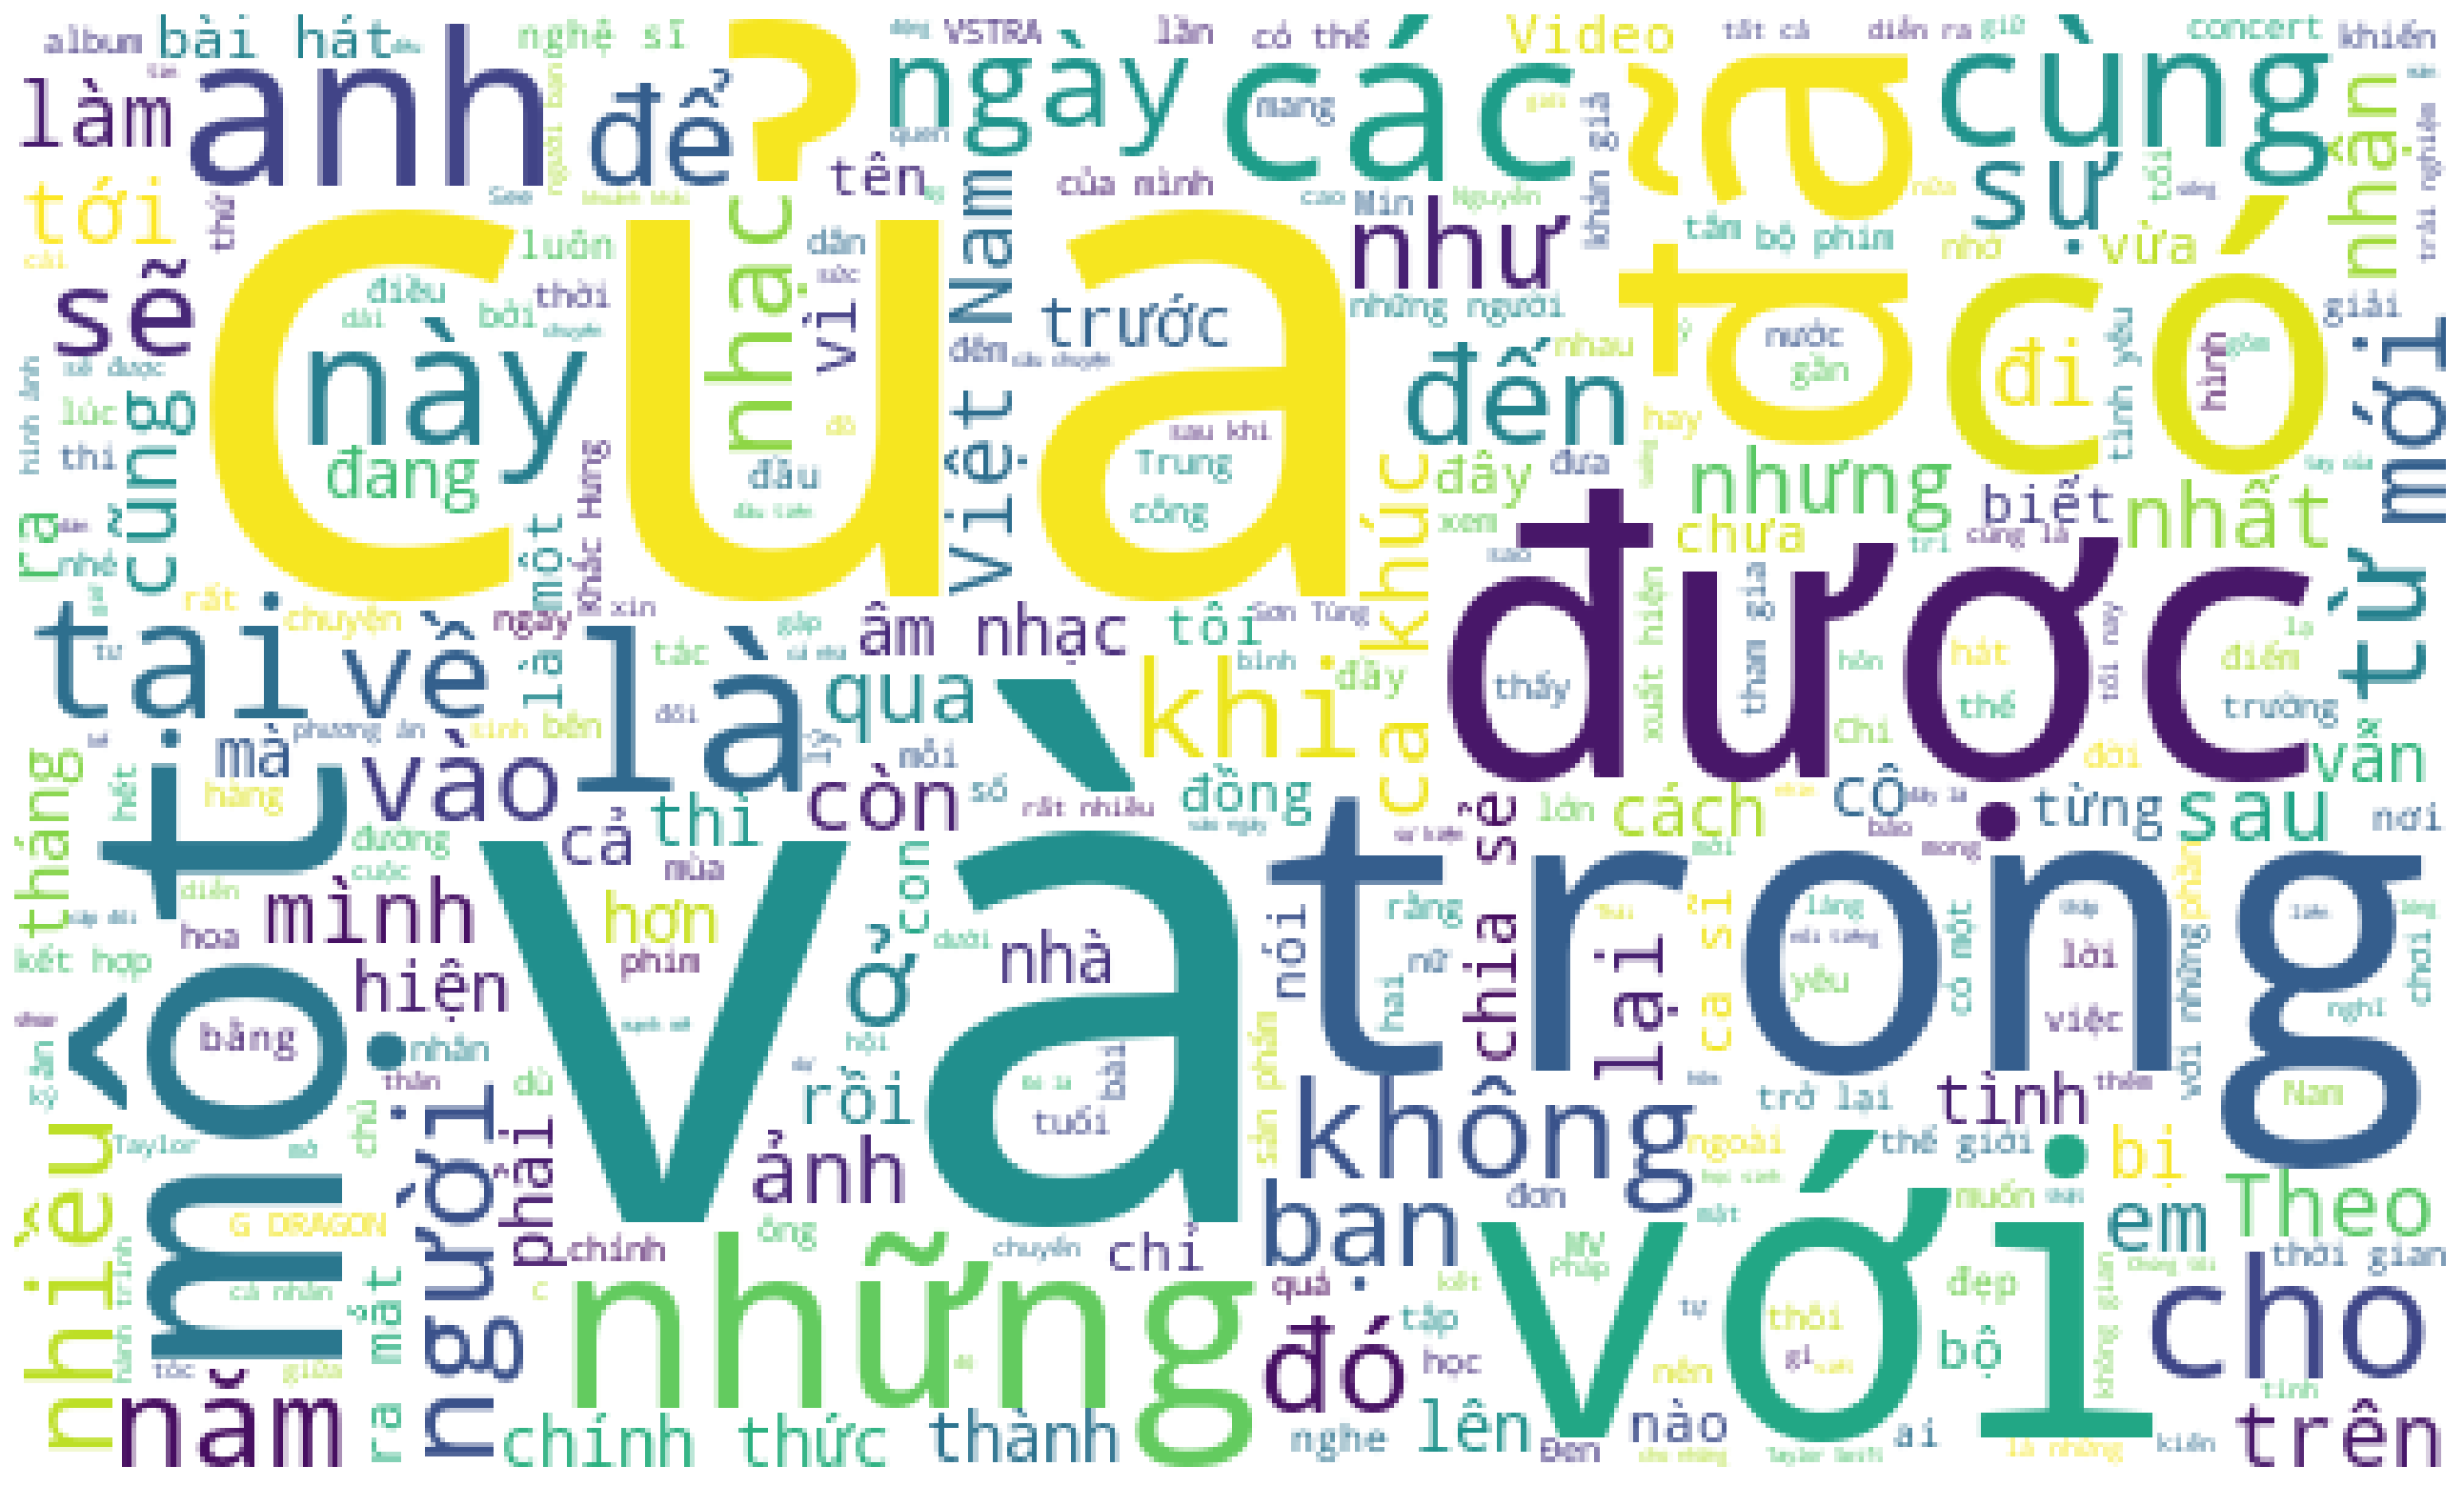

In [28]:
texto = text

wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='white', 
                      max_words=300,
                      width=500, height=300
                         ).generate(texto)
plt.figure(figsize=(40,20))
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

## Phân tích keyword.

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
chon 1 bai de phan tich reactors

In [29]:
reactor = df[df['post_id']==912919293533793]
reactor

,post_id,post_text,time,timestamp,images_description,comments,shares,comments_full,reactors,reactions,reaction_count
31,912919293533793,SƠN TÙNG M-TP MƯỢN SÂN KHẤU HÔM NAY ĐỂ CHÚC MỪ...,2023-11-25 22:52:46,1.700928e+09,"['Có thể là hình ảnh về 1 người và tóc mái', '...",176,66,"[{'comment_id': '760356642597061', 'comment_ur...","[{'name': 'Minh Phương', 'link': 'https://face...","{'like': 4183, 'love': 1963, 'haha': 11, 'wow'...",6217


ideal : 
- lấy thông tin tất cả những người tương tác với page 
- phân tích kiếm tệp người tương tác với page nhiều nhất hay còn gọi là người dùng trung thành.
- tần suất tương tác  

In [30]:
df['post_id']

0      914197540072635
1      914174400074949
2      914151560077233
3      913951943430528
4      913920416767014
            ...       
199    906122894213433
200    906132410879148
201    906147284210994
202    906040377555018
203    906017847557271
Name: post_id, Length: 204, dtype: int64

In [31]:
reactor_df_full = pd.DataFrame([{'name':'','link':'','type':''}])

In [32]:
reactor_df_full

,name,link,type
0,,,


In [33]:
reactor_df_full['name'].value_counts()

name
    1
Name: count, dtype: int64

In [34]:
for i in df['post_id']:
    reactor = df[df['post_id']== i]
    # chuyển thành list và xử lý dấu không cần thiết .
    reactor_list = reactor['reactors'].to_list()
    data_cleaned = [eval(d) for d in reactor_list]
    # chuyển thành list 1 chiều.
    data = sum(data_cleaned, [])
    # tạo dataframe lưu thông tin tất cả các người react trong bài post.
    temp = pd.DataFrame(data)
    reactor_df_full = pd.concat([reactor_df_full,temp],axis=0,ignore_index=True)
reactor_df_full

,name,link,type
0,,,
1,Lê Ngọc Phát,https://facebook.com/profile.php?id=1000953685...,like
2,진진,https://facebook.com/profile.php?id=1000952785...,like
3,Trong-Huy Nguyen,https://facebook.com/profile.php?id=1000951571...,love
4,Nguyễn Vânn,https://facebook.com/profile.php?id=1000949636...,like
...,...,...,...
17814,Dương Nguyễn,https://facebook.com/profile.php?id=1000901116...,like
17815,Nam Hoàng,https://facebook.com/profile.php?id=1000899741...,love
17816,Phan Quốc Việt,https://facebook.com/profile.php?id=1000913207...,love
17817,Hoang Ky Anh,https://facebook.com/profile.php?id=1000906789...,like


In [35]:
reactor_df_full['name'].value_counts()

name
Phạm Ngọc Minh Quân    106
Phạm Minh Khang         88
Trần Linh               58
Lê Hiếu                 51
Linh Hoang              49
                      ... 
Nguyen Hoai Anh          1
Vũ Gấm                   1
Ng.T.Thanh Hiền          1
Trần Mỹ Duyên            1
Phan Quốc Việt           1
Name: count, Length: 9818, dtype: int64

### Sự tương quan giữa thời gian đăng bài và các ngày trong tuần?

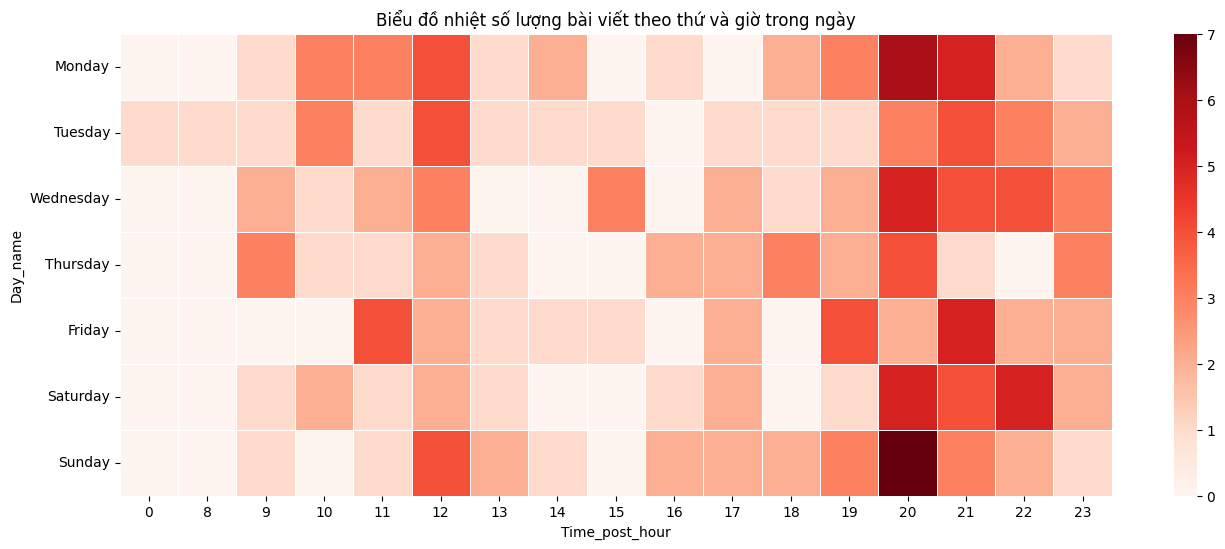

In [36]:
df1 = df
df1['time'] = pd.to_datetime(df1['time'])
#retrieve day name from datetime
df1['Day_name'] = df1['time'].dt.day_name()
# retrieve time_post(hour) from datetime
df1['Time_post_hour'] = df1['time'].dt.hour
# retrieve dd-mm-yy format
df1['post_time'] = df1['time'].dt.strftime('%d-%m-%y')

pivot_df = df1.pivot_table(index = 'Day_name', columns = 'Time_post_hour', aggfunc = 'size', fill_value = 0)
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
pivot_df = pivot_df.reindex(day_order)
plt.figure(figsize=(16, 6))
color_palette = sns.color_palette("Reds", as_cmap=True)
sns.heatmap(pivot_df, cmap=color_palette, annot=False, fmt='d', linewidths=.5)
plt.title('Biểu đồ nhiệt số lượng bài viết theo thứ và giờ trong ngày')
plt.show()

In [37]:
data = df[['post_text','time','timestamp','reaction_count']]
# thong tin bai post co reaction_count max
reaction_count_max = data['reaction_count'].max()
info_reaction_count_max = data[data['reaction_count']==reaction_count_max]
info_reaction_count_max.index = ['max']
# thong tin bai post co reaction_count min
reaction_count_min = data['reaction_count'].min()
info_reaction_count_min = data[data['reaction_count']==reaction_count_min]
info_reaction_count_min.index = ['min']
info_reaction_count_min_max = pd.concat([info_reaction_count_max,info_reaction_count_min],axis=0)
info_reaction_count_min_max

,post_text,time,timestamp,reaction_count
max,THẦY GIÁO NHẬT “NGẠI NGÙNG” KHI LẦN ĐẦU ĐƯỢC T...,2023-11-18 12:52:40,1.700287e+09,82515
min,Nhìn sâu vào chặng đường tìm kiếm bản thân mà ...,2023-11-24 20:31:58,1.700833e+09,64


In [38]:
df.nlargest(1,'reaction_count')

,post_id,post_text,time,timestamp,images_description,comments,shares,comments_full,reactors,reactions,reaction_count,Day_name,Time_post_hour,post_time
135,909089207250135,THẦY GIÁO NHẬT “NGẠI NGÙNG” KHI LẦN ĐẦU ĐƯỢC T...,2023-11-18 12:52:40,1.700287e+09,[],1400,1500,"[{'comment_id': '1460715988059959', 'comment_u...","[{'name': 'Minh Hằng', 'link': 'https://facebo...","{'like': 39963, 'love': 34694, 'haha': 2593, '...",82515,Saturday,12,18-11-23


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
# Những cái tên ảnh hưởng trong reactions.
- tổng hợp name nhưng người tương tác trong dữ liệu và phân tích nhưng cái tên ảnh hưởng nhất. Theo tần suất xuất hiện nữa. Tức là nếu người thực hiện nhiều tương tác sẽ góp phần tăng tỉ lệ ảnh hưởng lên. Nếu dùng unique thì sẽ ko đúng lắm vì nhưng người ko hay tương tác vs page sẽ có mức độ ảnh hưởng tương đương vs người thường tương tác.

In [39]:
names = reactor_df_full['name']
name_list1 = names.tolist()
print(name_list1)

['', 'Lê Ngọc Phát', '진진', 'Trong-Huy Nguyen', 'Nguyễn Vânn', 'Nguyễn Trần Hà Linh', 'Junie Tran', 'Lê Hiếu', 'Nguyễn Khánh Huyền', 'Thanh Thuy Le', 'Vũ Hoàng', 'Nguyễn Khánh Huyền', 'Minh Anh', 'Cam Tu', 'Đặng Tiến Thanh', 'Nguyễn Như', 'Phạm Ngọc Minh Quân', 'Lê Văn Hưởng', 'Ryan', 'Diệu Linh', 'Hạnh Nguyên', 'Đạo Nguyễn', 'Minhh Hanhh', 'Emma Emma', 'Quynh Anh', 'Ghét Ăn Cay', 'Tùng Lâm', 'Đỗ Việt', 'Huỳnh Kiều', 'Hồnng Annh', 'HaiYen Tran', 'Trung Hiếu', 'Phan Phan', 'Mai Phương', 'Phương Thảoo', 'Nhật Lê', 'Thu Hiền', 'Đỗ Gia', 'Nguyễn Aanh Đức', 'Nguyễn Vũ', 'Anh Dung', 'Ngọc Ánh', 'Nguyễn Hoàng Nguyên', 'Đặng Quang Huy', 'Dưa Hấu', 'Trần Thái', 'Kim Phương Thảo', 'Trung Híp', 'The Red Devils Viet Nam', 'Bravigo Khải Huỳnh', 'Hiếu Đào', 'Dương Thế Quang', 'Võ Hoàng Kiều Khanh', 'Thu Phuong', 'Bùi Khánh Linh', 'Thu Minh Trần', 'Phạm Tâm', 'Quân Le', 'Thanh Mai', 'Minh Hồng', 'Vũ Tuấn Kiệt', 'Danh Thị', 'Tan Phat', 'Hoàng Trọng Hùng', 'Phung Quoc Anh Tuan', 'Mits Xấy Zòn', 'Mai Pha

In [40]:
# lấy name trong commenter_name 
import datetime
import json
df_comments = df
name_list2 = []
for i in range(len(df)):
    x = eval(df_comments['comments_full'].iloc[i])
    for cmt in x:
        name_list2.append(cmt['commenter_name'])  
print(name_list2)

['An Tư Nhiên', 'Phụng Kim Phụng', 'Hồ Lê Ngọc Chính', 'Quyên Phan', 'Steven Bùi', 'Nguyễn Thanh Hải', 'Đặng Hoàng Minh Nhật', 'Tuan Hao', 'Lê Đại Nguyên', 'Hà Chi', 'Thu Hang Pham', 'Bao-Chau Tran', 'Hà Trang', 'Hạ Trang', 'Hiếuu Phạm', 'Đỗ Gia', 'Trinh', 'Phượng Emm', 'Mee vô tri', 'Nguyen Tuong', 'Phạm Quang Tường', 'Huỳnh Hưng', 'Tạ Hải Đăng', 'Nguyễn Hà My', 'Kuro Chiến', 'Đô Niê', 'Mai Anh', 'Minh Quang Nguyễn', 'Nhu Y Kim', 'Quang Đỗ', 'Giao Bầu', 'Nguyễn Lý Thành Đạt', 'Ngô Thái Mộng Bình ', 'Lethal Tempo', 'Trần Anh Tài', 'Quốc Tuấn', 'Ngọc Tâm', 'Kiều Duy Thuận', 'Nguyễn Đức Huy', 'Nguyễn Đức Anh', 'Đặng Văn Toàn', 'Nguyen Hoang Cam', 'Nguyễn Hoàng Hải', 'Hàn Mạc Hoa', 'Alan Le', 'Đặng Thông', 'Hải Vy', 'Ngoc Vyy', 'Le Minh Thu', 'Nguyễn Ngọc', 'California Fitness And Yoga Centuryon Royal City', 'Nguyệt Dễ Thương', 'Khoa Raw', 'Nguyen Thanh Thuy', 'Nị Thanh Nhã', 'Họ Nguyễn Tên Chỉnh', 'Nguyễn Vũ Anh Minh', 'Tuyền Bíchh', 'Đài Phát Thanh.', 'Phamhoang Hai', 'California Fitnes

In [41]:
# lấy name trong comment_reactors 
import datetime
import json
df_comments = df
data = []
for i in range(len(df)):
    x = eval(df_comments['comments_full'].iloc[i])
    for cmt in x:
        data.append(cmt['comment_reactors']) 
name_list3 = []  # Danh sách để lưu trữ các giá trị name

for sublist in data:
    for item in sublist:
        if 'name' in item:
            name = item['name']  # Trích xuất giá trị name từ từng phần tử
            name_list3.append(name)  # Thêm giá trị name vào danh sách name_list

print(name_list3)


['Trang Thơ', 'Nam Anh', 'Thuy Le', 'Hải Yến', 'Đặng Lan Anh', 'Hoàng Hải', 'Đức Hanh🐁', 'việt hoàng', 'Dương Thanh Tùng', 'Tùng Minh Đoàn', 'Cây Sậy', 'Nguyễn Thiên Lộc', 'Thuy Le', 'Hoàng Hải', 'Dương Thanh Tùng', 'Tùng Minh Đoàn', 'Cây Sậy', 'Hoàng Hải', 'Tell me your name', 'Đỗ Quyên', 'Hồng Thúy', 'Đỗ Kiên', 'James Cole', 'Phạm Khánh Duy', 'Võ Trung Thành', 'Lam Nguyen', 'Nguyen Ngoc Tan', 'Trần Vĩnh Huy', 'Phạm Thị Quỳnh Anh', 'Manh Nguyen', 'Lâm Tùng Tân', 'Nguyễn Thị Khánh Hường', 'Hoàng Trần', 'Hoàng Long', 'Trần Minh Trang', 'ThuBen Duong', 'Nguyễn Xuân Trườngg', 'Thanh Tùng', 'Nguyễn Vũ Như Quỳnh', 'Mas Mas', 'Nguyễn Sinh Quang', 'Tài Ngô', 'Nguyễn Linh Trang', 'Nguyễn AnhThu', 'Quỳnh Trang', 'Ngọc Ánh', 'Kênh Của Sâu', 'Hà Phương Nguyễn', 'An Hoàng', 'Minh Phuong', 'Duck Pahm', 'Nguyễn Diệp', 'Thảo Hiền Phan', 'Hồng Phúc', 'Khanh Tran Linh', 'Liêm Thanh', 'Bee Bee', 'Vinh Nguyễn Phúc', 'Nguyen Phuong', 'Haroune Rohimah', 'Mac Kinh Gia Hiep', 'Ngūy Hoạn', 'Thu Ngân', 'Yumi J

In [42]:
# tổng hợp text của 3 list.
text = ""
for i in name_list1:
    text = text + i + "\n"
for i in name_list2:
    text = text + i + "\n"
for i in name_list3:
    text = text + i + "\n"
len(text)

336513

In [43]:
print(text)


Lê Ngọc Phát
진진
Trong-Huy Nguyen
Nguyễn Vânn
Nguyễn Trần Hà Linh
Junie Tran
Lê Hiếu
Nguyễn Khánh Huyền
Thanh Thuy Le
Vũ Hoàng
Nguyễn Khánh Huyền
Minh Anh
Cam Tu
Đặng Tiến Thanh
Nguyễn Như
Phạm Ngọc Minh Quân
Lê Văn Hưởng
Ryan
Diệu Linh
Hạnh Nguyên
Đạo Nguyễn
Minhh Hanhh
Emma Emma
Quynh Anh
Ghét Ăn Cay
Tùng Lâm
Đỗ Việt
Huỳnh Kiều
Hồnng Annh
HaiYen Tran
Trung Hiếu
Phan Phan
Mai Phương
Phương Thảoo
Nhật Lê
Thu Hiền
Đỗ Gia
Nguyễn Aanh Đức
Nguyễn Vũ
Anh Dung
Ngọc Ánh
Nguyễn Hoàng Nguyên
Đặng Quang Huy
Dưa Hấu
Trần Thái
Kim Phương Thảo
Trung Híp
The Red Devils Viet Nam
Bravigo Khải Huỳnh
Hiếu Đào
Dương Thế Quang
Võ Hoàng Kiều Khanh
Thu Phuong
Bùi Khánh Linh
Thu Minh Trần
Phạm Tâm
Quân Le
Thanh Mai
Minh Hồng
Vũ Tuấn Kiệt
Danh Thị
Tan Phat
Hoàng Trọng Hùng
Phung Quoc Anh Tuan
Mits Xấy Zòn
Mai Pham
Võ Ngọc Thúy Ái
Thanh Nhàn
Hà Bùi
Giang Trương
Dieu Linh
Minh Phương
Dieu Dieu
Thu Phan
Nguyễn Thị Long Điền
Hồng Ngọc
Nguyen Duongg
Haan Chang
Thảo Nguyên
Ngân Trần
Nguyễn Tiến Quân
Lê Thị Thiên Th

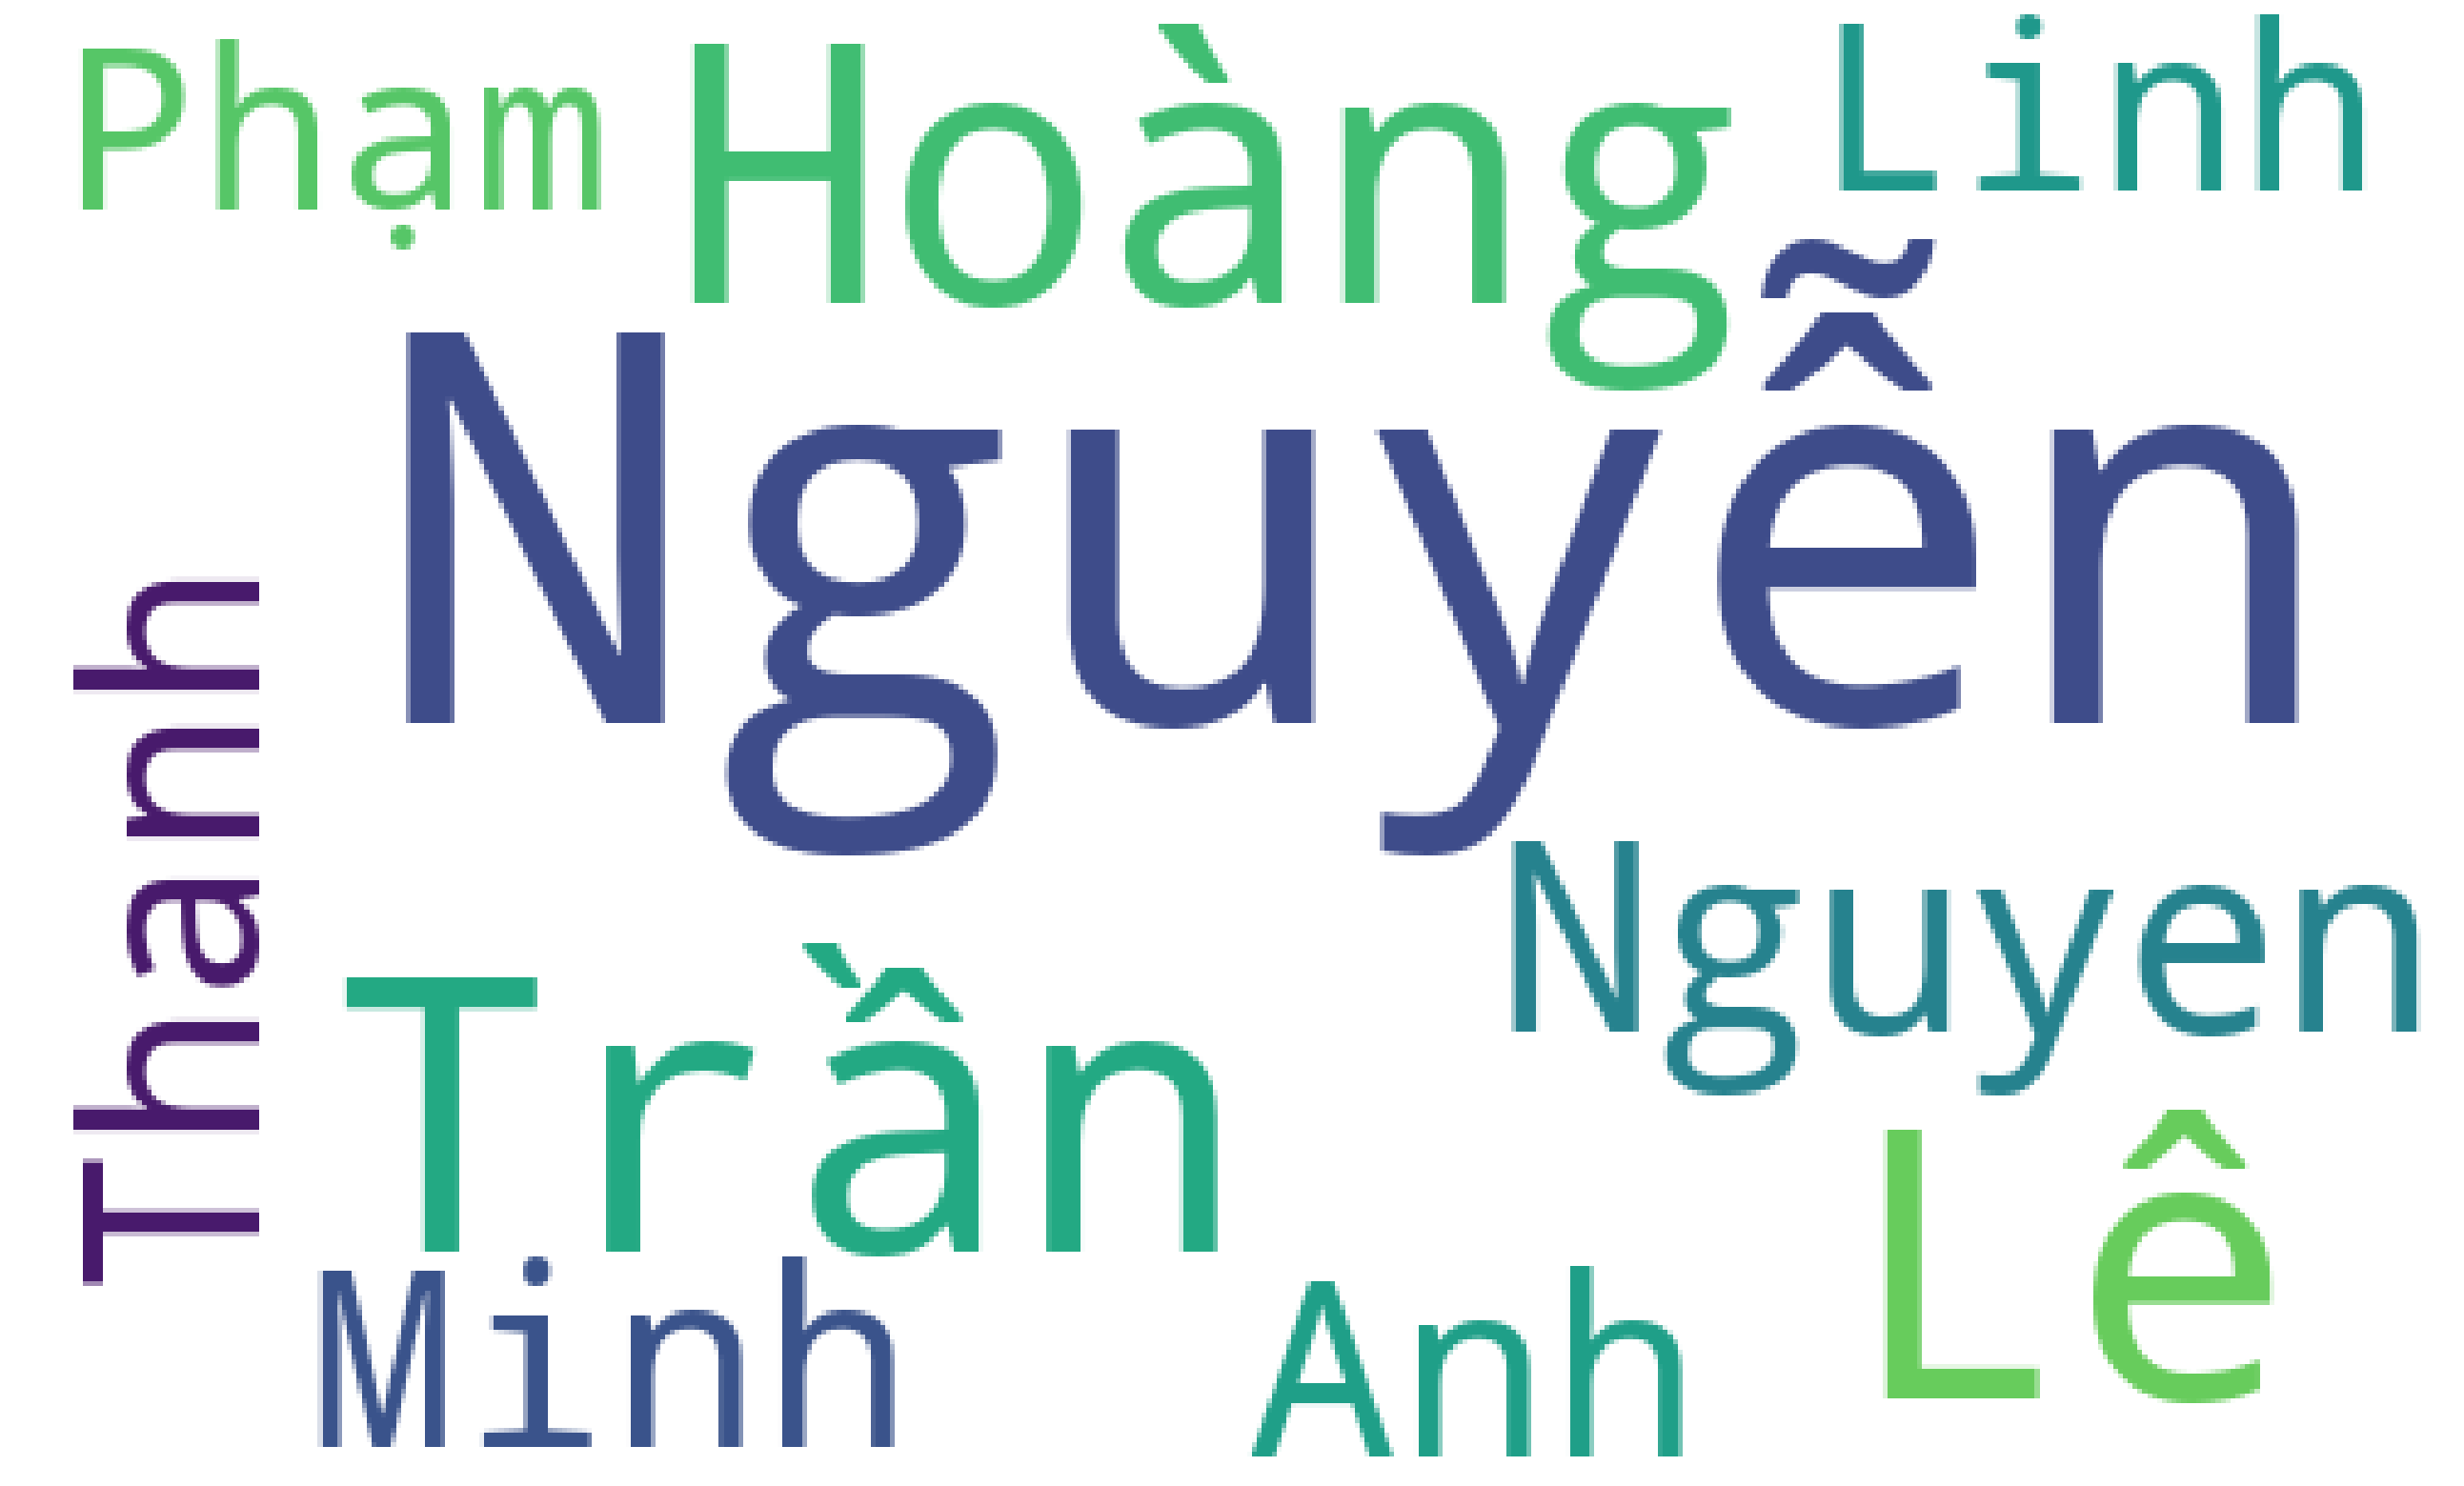

In [44]:
texto = text

wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='white', 
                      max_words=10,
                      width=500, height=300
                         ).generate(texto)
plt.figure(figsize=(40,20))
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

Lượng bài đăng thay đổi trong các ngày.

<BarContainer object of 204 artists>

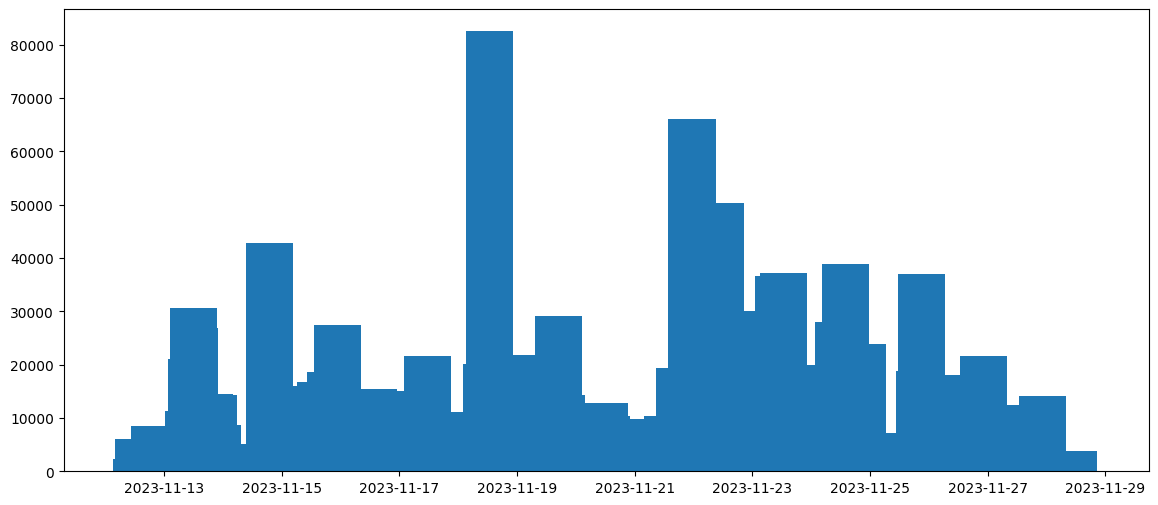

In [45]:
plt.subplots(figsize=(14, 6))
plt.bar(x=df['time'],height=df['reaction_count'])

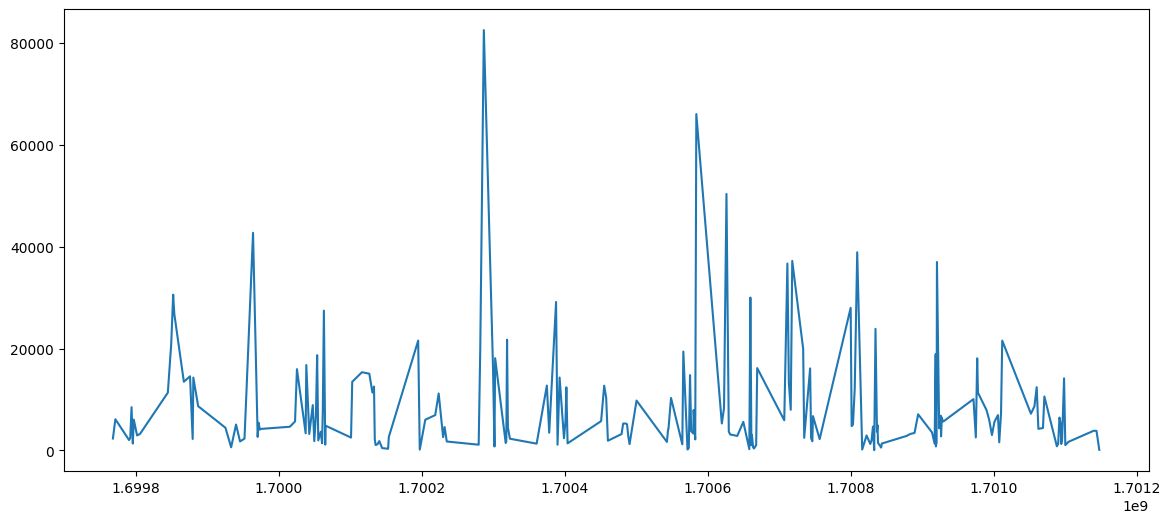

In [46]:
df_react = df
# df_react['time'] = pd.to_datetime(df_react['time'])
fig, ax = plt.subplots(figsize=(14, 6))
ax.plot(df_react['timestamp'],df_react['reaction_count'])

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   post_id             204 non-null    int64         
 1   post_text           204 non-null    object        
 2   time                204 non-null    datetime64[ns]
 3   timestamp           204 non-null    float64       
 4   images_description  204 non-null    object        
 5   comments            204 non-null    int64         
 6   shares              204 non-null    int64         
 7   comments_full       204 non-null    object        
 8   reactors            204 non-null    object        
 9   reactions           204 non-null    object        
 10  reaction_count      204 non-null    int64         
 11  Day_name            204 non-null    object        
 12  Time_post_hour      204 non-null    int32         
 13  post_time           204 non-null    object        

### so sánh tương quan với độ dài bài viết.

In [65]:
post_df_full_with_reactions['post_len'] = post_df_full_with_reactions['post_text'].apply(len).astype(float)
post_df_full_with_reactions['post_len']

0      134.0
1      457.0
2       87.0
3       75.0
4      376.0
       ...  
199    251.0
200    591.0
201    436.0
202    130.0
203    619.0
Name: post_len, Length: 204, dtype: float64

In [67]:
corr_matrix = post_df_full_with_reactions[['reaction_count', 'comments', 'shares', 'post_len']].corr()

print(corr_matrix)

                reaction_count  comments    shares  post_len
reaction_count        1.000000  0.563349  0.591946 -0.278590
comments              0.563349  1.000000  0.478938 -0.195564
shares                0.591946  0.478938  1.000000 -0.165437
post_len             -0.278590 -0.195564 -0.165437  1.000000


Text(0.5, 1.0, 'Biểu đồ Heatmap - Sự tương quan giữa Reaction, Comments, shares và độ dài bài viết')

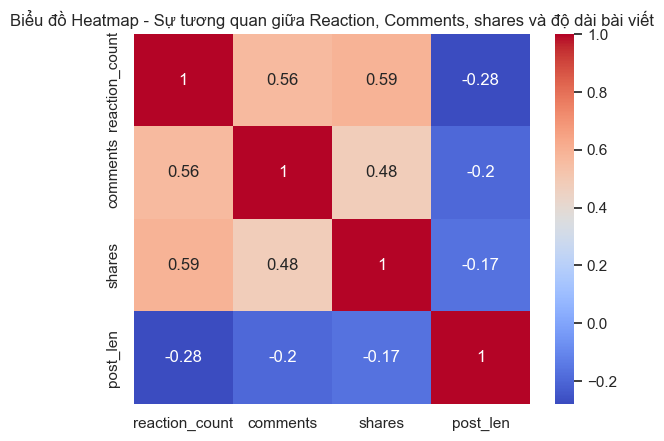

In [69]:
# Vẽ biểu đồ heatmap thể hiện tương quan
sns.set(style="white")  # Chọn giao diện màu sắc
heatmap = sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title('Biểu đồ Heatmap - Sự tương quan giữa Reaction, Comments, shares và độ dài bài viết')